In [32]:
import tensorflow as tf
import pickle
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.python.client import device_lib
import pandas as pd


In [33]:
device_lib.list_local_devices()

2022-04-27 21:40:09.398497: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-27 21:40:09.398797: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2362456825060166673
 xla_global_id: -1]

In [34]:
pickle_in = open("/home/karol/model_training_data/X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("/home/karol/model_training_data/y.pickle","rb")
y = pickle.load(pickle_in)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
X_train = X_train/255
X_test = X_test/255

In [37]:
print(X_test.dtype)

float64


In [38]:
print(y_train.shape)

(7200, 1)


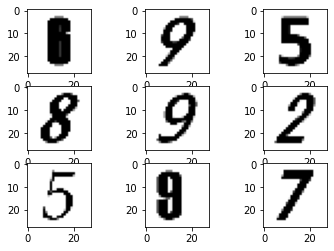

In [39]:
plt.figure()
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [40]:
IMG_SHAPE = X_train.shape[1:]

In [41]:
model = models.Sequential()
model.add(layers.Conv2D(128, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=IMG_SHAPE))
model.add(layers.Conv2D(256, (2, 1), activation='relu')),
model.add(layers.MaxPooling2D(pool_size=(2, 2))),
model.add(layers.Conv2D(128, kernel_size=(3, 3) ,activation='relu'))

In [42]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(9))

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 conv2d_7 (Conv2D)           (None, 25, 26, 256)       65792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 13, 256)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 10, 11, 128)       295040    
                                                                 
 flatten (Flatten)           (None, 14080)             0         
                                                                 
 dense (Dense)               (None, 64)                901184    
                                                      

In [44]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=5, 
                    validation_data=(X_test,y_test))

Epoch 1/5
225/225 [==============================] - 14s 61ms/step - loss: 0.3462 - accuracy: 0.8893 - val_loss: 0.0853 - val_accuracy: 0.9739
Epoch 2/5
225/225 [==============================] - 14s 60ms/step - loss: 0.0541 - accuracy: 0.9837 - val_loss: 0.0438 - val_accuracy: 0.9861
Epoch 3/5
225/225 [==============================] - 13s 59ms/step - loss: 0.0273 - accuracy: 0.9925 - val_loss: 0.0664 - val_accuracy: 0.9794
Epoch 4/5
225/225 [==============================] - 14s 63ms/step - loss: 0.0251 - accuracy: 0.9932 - val_loss: 0.0509 - val_accuracy: 0.9817
Epoch 5/5
225/225 [==============================] - 14s 63ms/step - loss: 0.0156 - accuracy: 0.9957 - val_loss: 0.0309 - val_accuracy: 0.9917


Text(0.5, 0, 'epochs')

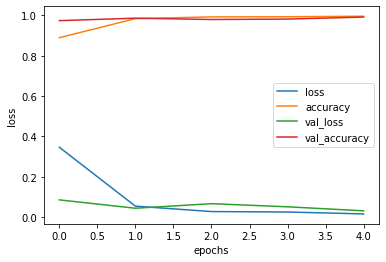

In [45]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [46]:
model.evaluate(X_test, y_test)

57/57 [==============================] - 1s 14ms/step - loss: 0.0309 - accuracy: 0.9917


[0.03092385269701481, 0.9916666746139526]

In [47]:
model.save("model.h5")